In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import joypy
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from urllib.request import urlopen
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
import warnings; warnings.filterwarnings(action='once')
from mplsoccer import add_image, FontManager
import matplotlib.lines as lines

crab_pic = "https://github.com/ohthatcrab/crabstats/blob/main/Crab%20Stats.png?raw=true"
cs_circ = Image.open(urlopen(crab_pic))

font_normal = FontManager(('https://github.com/googlefonts/changa-vf/blob/master/fonts/ttf/'
                           'Changa-Regular.ttf?raw=true'))
font_bold = FontManager(("https://github.com/googlefonts/changa-vf/blob/master/fonts/ttf/"
                         "Changa-Bold.ttf?raw=true"))

large = 22; med = 16; small = 8
params = {'axes.titlesize': large,
          'legend.fontsize': small,
          'figure.figsize': (16, 10),
          'axes.labelsize': small,
          'axes.titlesize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large}
plt.rcParams.update(params)

plt.style.use('fivethirtyeight')

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

#load data
file =(r'C:\Users\scott\OneDrive\Soccer Stats\Premier League Sim 2021-22.xlsm')
df = pd.read_excel(file, 
                        sheet_name = "Sim Results", header = 1)
df = df.sort_values("Overall",ascending=False)
df['avg_pts'] = df.groupby('Team')['Pts'].mean()
df['sub_group_rank'] = df.groupby('Team')['Pts'].rank(method='average', ascending=True)



C:\Users\scott\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\scott\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


C:\Users\scott\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 6080x3800 with 0 Axes>

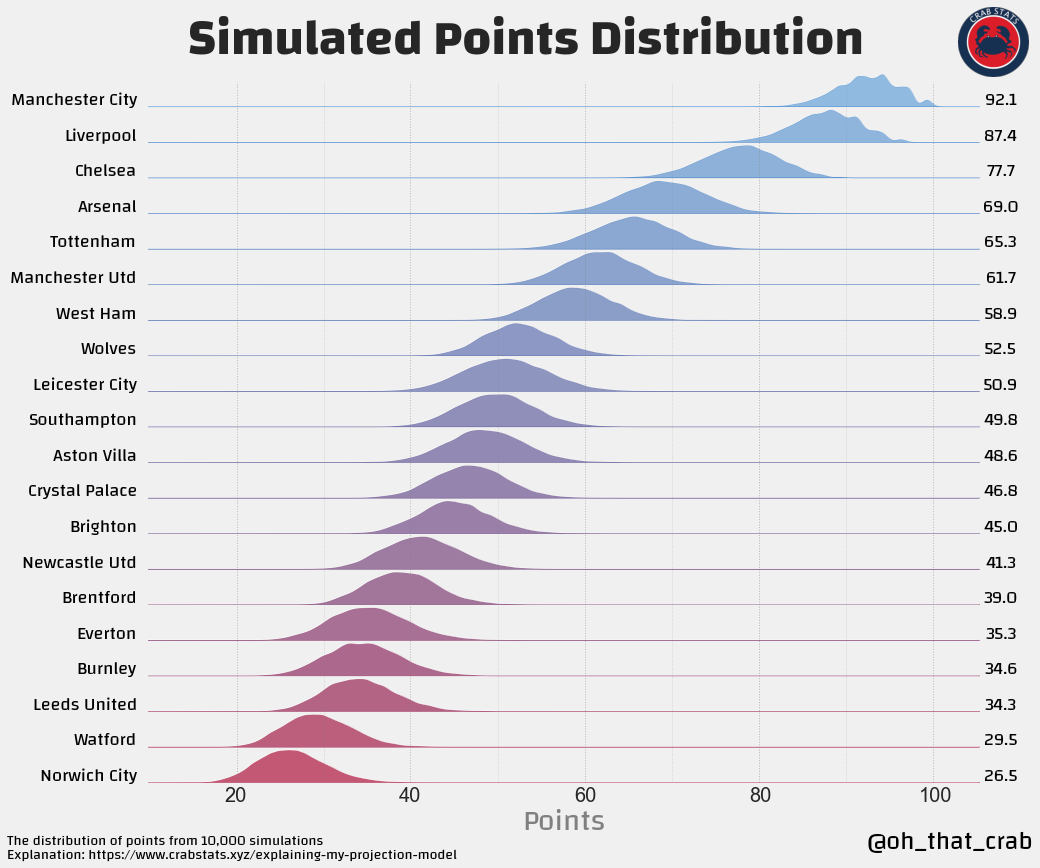

In [264]:
dfavg = df.groupby('Team').mean()
dfavg = dfavg.sort_values('Pts', ascending=False)
index = dfavg.index
a_list = list(index)
pts = dfavg.Pts
c_list = list(pts)
b_list = [round(num, 1) for num in c_list]

#create a color gradent function to be used in the colormap parameter
def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)#show the table
#print(df.head(20))#plot the figure
plt.figure(dpi=380)
fig, ax = joypy.joyplot(df
                          , column=['Pts','Team']
                          , overlap=0.0
                          , by="Overall"
                          , ylim='own'
                          , x_range=(10,105)
                          , fill=True
                          , figsize=(15,13)
                          , legend=False
                          , xlabels=True
                          , ylabels=False
                          #, color=['#76a5af', '#134f5c']
                          , colormap=lambda x: color_gradient(x, start=(.08, .45, .8)
                                                             ,stop=(.8, .34, .44))
                          , alpha=0.6
                          , linewidth=.5
                          , linecolor='w'
                          #, background='k' # change to 'k' for black background or 'grey' for grey
                          , fade=True)
plt.subplots_adjust(left=0.15,
                    bottom=0.12,
                    right=0.92,
                    top=0.88,
                   )
#plt.title('Projected Points',fontproperties=font_bold.prop
#          , fontsize=34
#         , color='grey'
#          , alpha=1)
plt.rc("font", size=20,)
plt.gca().invert_yaxis()
plt.xlabel('Points', fontsize=30, color='grey', fontproperties=font_normal.prop)
fig.text(.5,0.9,f"Simulated Points Distribution",size=50, ha='center',fontproperties=font_bold.prop)
fig.text(.97,0.05,'@oh_that_crab', size=25, color='#000000', ha='right', style='italic',fontproperties=font_normal.prop)
#cs_logo = add_image(crab_pic, fig, left=0.9, bottom=0.89,width=0.1,height=0.1)
x=0
for i in a_list:
    fig.text(0.14,(0.845-(x*0.038)),a_list[x], size=18, color='#000000', ha='right', fontproperties=font_normal.prop)
    x= x+1
import matplotlib.lines as lines
fig.add_artist(lines.Line2D([0.233, 0.233], [0.122, 0.87], c='grey', linestyle='dotted', linewidth=1, alpha=0.5))
fig.add_artist(lines.Line2D([0.313, 0.313], [0.122, 0.87], c='grey', linestyle='dotted', linewidth=0.5, alpha=0.5))
fig.add_artist(lines.Line2D([0.393, 0.393], [0.122, 0.87], c='grey', linestyle='dotted', linewidth=1, alpha=0.5))
fig.add_artist(lines.Line2D([0.474, 0.474], [0.122, 0.87], c='grey', linestyle='dotted', linewidth=0.5, alpha=0.5))
fig.add_artist(lines.Line2D([0.555, 0.555], [0.122, 0.87], c='grey', linestyle='dotted', linewidth=1, alpha=0.5))
fig.add_artist(lines.Line2D([0.6355, 0.6355], [0.122, 0.87], c='grey', linestyle='dotted', linewidth=0.5, alpha=0.5))
fig.add_artist(lines.Line2D([0.716, 0.716], [0.122, 0.87], c='grey', linestyle='dotted', linewidth=1, alpha=0.5))
fig.add_artist(lines.Line2D([0.7965, 0.7965], [0.122, 0.87], c='grey', linestyle='dotted', linewidth=0.5, alpha=0.5))
fig.add_artist(lines.Line2D([0.877, 0.877], [0.122, 0.87], c='grey', linestyle='dotted', linewidth=1, alpha=0.5))
x=0
for i in b_list:
    fig.text(0.94,(0.845-(x*0.038)),b_list[x], size=18, color='#000000', ha='center', fontproperties=font_normal.prop)
    x= x+1
#today = date.today()
date = datetime.now().strftime("%Y_%m_%d")
ax_cs_logo = add_image(cs_circ, fig, left=0.9, bottom=0.875, width=0.065)
fig.text(0,1,'', alpha=0,
         size=14, color='#000000', ha='left',fontproperties=font_normal.prop)
fig.text(.02,0.04,'The distribution of points from 10,000 simulations\nExplanation: https://www.crabstats.xyz/explaining-my-projection-model',
         size=14, color='#000000', ha='left',fontproperties=font_normal.prop)
plt.show
plt.savefig('Simulations/Premier League Simulation - ' + date + '.png', bbox_inches='tight')

C:\Users\scott\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-252-cd8761a24c32>:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('Simulations/Premier League Simulation Table - ' + date + '.png', bbox_inches='tight')
C:\Users\scott\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


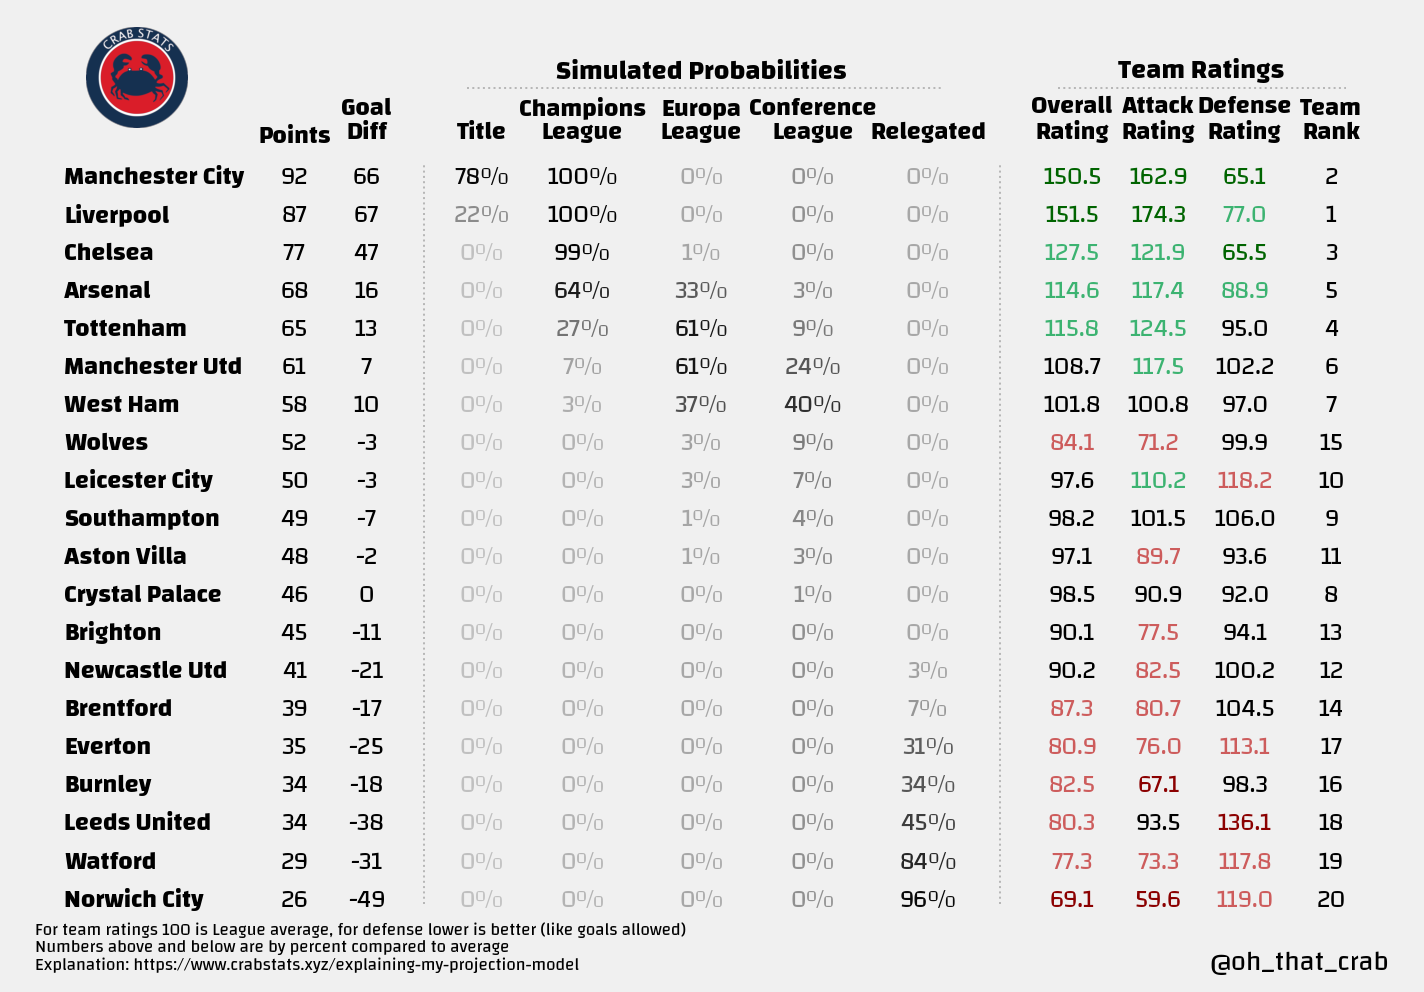

In [252]:
dfpts = pd.read_csv(r'sim.csv', encoding='utf-8', error_bad_lines=False,skip_blank_lines=True)
dfpts = dfpts.sort_values('Points', ascending=False) 
tm_list = list(dfpts['Squad'])
tm_rate = list(dfpts['Team Rating'])
tm_pts = list(dfpts['Points'])
tm_gd = list(dfpts['GD'])
tm_title = list(dfpts['Title'])
tm_chmps = list(dfpts['Champions League'])
tm_el = list(dfpts['Europa League'])
tm_crl = list(dfpts['Confrence League'])
tm_rel = list(dfpts['Relegation'])
tm_rate_a = list(dfpts['Attack'])
tm_rate_d = list(dfpts['Defense'])
tm_rate_o = list(dfpts['Team Strength'])

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,14), tight_layout=True)
ax = fig.add_subplot(111)
ax.grid(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#fig.text(0.14,0.845,tm_list[0], size=25, color='#000000', ha='right', style='italic',fontproperties=font_normal.prop)
x=0
for i in tm_list:
    fig.text(0.05,(0.81-(x*0.03775)),tm_list[x], size=25, color='#000000', ha='left', fontproperties=font_bold.prop)
    x= x+1
x=0
fig.text(0.21,0.85,'Points', size=25, color='#000000', ha='center', fontproperties=font_bold.prop)
for i in tm_pts:
    fig.text(0.21,(0.81-(x*0.03775)),int(tm_pts[x]), size=25, color='#000000', ha='center', fontproperties=font_normal.prop)
    x= x+1
x=0
fig.text(0.26,0.85,'Goal\nDiff', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_gd:
    fig.text(0.26,(0.81-(x*0.03775)),int(tm_gd[x]), size=25, color='#000000', ha='center', fontproperties=font_normal.prop)
    x= x+1
fig.add_artist(lines.Line2D([0.30, 0.30], [0.095, 0.83], c='grey', linestyle='dotted', linewidth=2, alpha=0.5))
x=0
fig.text(0.34,0.85,'Title', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_title:
    s = int(round(tm_title[x]*100,0))
    if tm_title[x]+0.2 > 1:
        a = 0
    else:
        a=0.2
    fig.text(0.34,(0.81-(x*0.03775)),f'{s}%', size=25, color='#000000', ha='center', alpha= tm_title[x]+a, fontproperties=font_normal.prop)
    x= x+1
x=0
fig.text(0.41,0.85,'Champions\nLeague', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_chmps:
    s = int(round(tm_chmps[x]*100,0))
    if tm_chmps[x]+0.25 > 1:
        a = 0
    else:
        a=0.25
    fig.text(0.41,(0.81-(x*0.03775)),f'{s}%', size=25, color='#000000', ha='center', alpha= tm_chmps[x]+a, fontproperties=font_normal.prop)
    x= x+1
x=0
fig.text(0.4925,0.91,'Simulated Probabilities', size=27, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
fig.add_artist(lines.Line2D([0.33, 0.66], [0.905, 0.905], c='grey', linestyle='dotted', linewidth=2, alpha=0.5))
fig.text(0.4925,0.85,'Europa\nLeague', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_el:
    s = int(round(tm_el[x]*100,0))
    if tm_el[x]+0.3 > 1:
        a = 0
    else:
        a=0.3
    fig.text(0.4925,(0.81-(x*0.03775)),f'{s}%', size=25, color='#000000', ha='center', alpha= tm_el[x]+a, fontproperties=font_normal.prop)
    x= x+1
x=0
fig.text(0.57,0.85,'Conference\nLeague', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_crl:
    s = int(round(tm_crl[x]*100,0))
    if tm_crl[x]+0.4 > 1:
        a = 0
    else:
        a=0.4
    fig.text(0.57,(0.81-(x*0.03775)),f'{s}%', size=25, color='#000000', ha='center', alpha= tm_crl[x]+a, fontproperties=font_normal.prop)
    x= x+1    
x=0
fig.text(0.65,0.85,'Relegated', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_rel:
    s = int(round(tm_rel[x]*100,0))
    if tm_rel[x]+0.3 > 1:
        a = 0
    else:
        a=0.3
    fig.text(0.65,(0.81-(x*0.03775)),f'{s}%', size=25, color='#000000', ha='center', alpha= tm_rel[x]+a,fontproperties=font_normal.prop)
    x= x+1
fig.add_artist(lines.Line2D([0.7, 0.7], [0.095, 0.83], c='grey', linestyle='dotted', linewidth=2, alpha=0.5))
x=0
fig.text(0.75,0.85,'Overall\nRating', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_rate:
    if tm_rate[x]> 130:
        c = 'darkgreen'
    elif tm_rate[x]> 110:
        c = 'mediumseagreen'
    elif tm_rate[x]> 90:
        c = 'black'
    elif tm_rate[x]> 70:
        c = 'indianred'
    else:
        c = 'darkred'
    fig.text(0.75,(0.81-(x*0.03775)),round(tm_rate[x],1), size=25, color=c, ha='center', fontproperties=font_normal.prop)
    x= x+1
x=0
fig.text(0.81,0.85,'Attack\nRating', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_rate_a:
    if tm_rate_a[x]> 130:
        c = 'darkgreen'
    elif tm_rate_a[x]> 110:
        c = 'mediumseagreen'
    elif tm_rate_a[x]> 90:
        c = 'black'
    elif tm_rate_a[x]> 70:
        c = 'indianred'
    else:
        c = 'darkred'
    fig.text(0.81,(0.81-(x*0.03775)),round(tm_rate_a[x],1), size=25, color=c, ha='center', fontproperties=font_normal.prop)
    x= x+1
x=0
fig.text(0.84,0.91,'Team Ratings', size=27, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
fig.add_artist(lines.Line2D([0.74, 0.94], [0.905, 0.905], c='grey', linestyle='dotted', linewidth=2, alpha=0.5))
fig.text(0.87,0.85,'Defense\nRating', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_rate_d:
    if tm_rate_d[x]< 70:
        c = 'darkgreen'
    elif tm_rate_d[x]< 90:
        c = 'mediumseagreen'
    elif tm_rate_d[x]< 110:
        c = 'black'
    elif tm_rate_d[x]< 130:
        c = 'indianred'
    else:
        c = 'darkred'
    fig.text(0.87,(0.81-(x*0.03775)),round(tm_rate_d[x],1), size=25, color=c, ha='center', fontproperties=font_normal.prop)
    x= x+1
x=0
fig.text(0.93,0.85,'Team\nRank', size=25, color='#000000',va='bottom', ha='center', fontproperties=font_bold.prop)
for i in tm_rate_o:
    fig.text(0.93,(0.81-(x*0.03775)),round(tm_rate_o[x],1), size=25, color='#000000', ha='center', fontproperties=font_normal.prop)
    x= x+1
fig.text(.97,0.03,'@oh_that_crab', size=27, color='#000000', ha='right', style='italic',fontproperties=font_normal.prop)
fig.text(.03,0.03,'For team ratings 100 is League average, for defense lower is better (like goals allowed)\nNumbers above and below are by percent compared to average\nExplanation: https://www.crabstats.xyz/explaining-my-projection-model',
         size=17, color='#000000', ha='left',fontproperties=font_normal.prop)
ax_cs_logo = add_image(cs_circ, fig, left=0.065, bottom=0.865, height=0.1)
plt.savefig('Simulations/Premier League Simulation Table - ' + date + '.png', bbox_inches='tight')
plt.show()

0.9646